In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#datapreprocessing
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.model_selection import train_test_split

#models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

##model evaluation
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


In [2]:
data = pd.read_csv("fetal_health.csv")
data.head(25).T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
baseline value,120.0,132.000,133.000,134.000,132.000,134.000,134.000,122.0,122.000,122.000,...,130.000,130.000,131.000,130.000,130.000,129.000,128.000,128.000,128.0,128.000
accelerations,0.0,0.006,0.003,0.003,0.007,0.001,0.001,0.0,0.000,0.000,...,0.006,0.006,0.002,0.003,0.005,0.000,0.005,0.000,0.0,0.000
fetal_movement,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,...,0.380,0.441,0.383,0.451,0.469,0.340,0.425,0.334,0.0,0.000
uterine_contractions,0.0,0.006,0.008,0.008,0.008,0.010,0.013,0.0,0.002,0.003,...,0.004,0.005,0.003,0.006,0.005,0.004,0.003,0.003,0.0,0.003
light_decelerations,0.0,0.003,0.003,0.003,0.000,0.009,0.008,0.0,0.000,0.000,...,0.004,0.005,0.005,0.004,0.004,0.002,0.003,0.003,0.0,0.000
severe_decelerations,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000
prolongued_decelerations,0.0,0.000,0.000,0.000,0.000,0.002,0.003,0.0,0.000,0.000,...,0.001,0.000,0.002,0.001,0.001,0.003,0.002,0.003,0.0,0.000
abnormal_short_term_variability,73.0,17.000,16.000,16.000,16.000,26.000,29.000,83.0,84.000,86.000,...,19.000,24.000,18.000,23.000,29.000,30.000,26.000,34.000,80.0,86.000
mean_value_of_short_term_variability,0.5,2.100,2.100,2.400,2.400,5.900,6.300,0.5,0.500,0.300,...,2.300,2.100,2.400,1.900,1.700,2.100,1.700,2.500,0.5,0.300
percentage_of_time_with_abnormal_long_term_variability,43.0,0.000,0.000,0.000,0.000,0.000,0.000,6.0,5.000,6.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,79.000


In [3]:
data.info()
print("\nwe have", data.shape[0], "data points and", data.shape[1], "features")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
data["fetal_health"] = data["fetal_health"].astype("category")
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


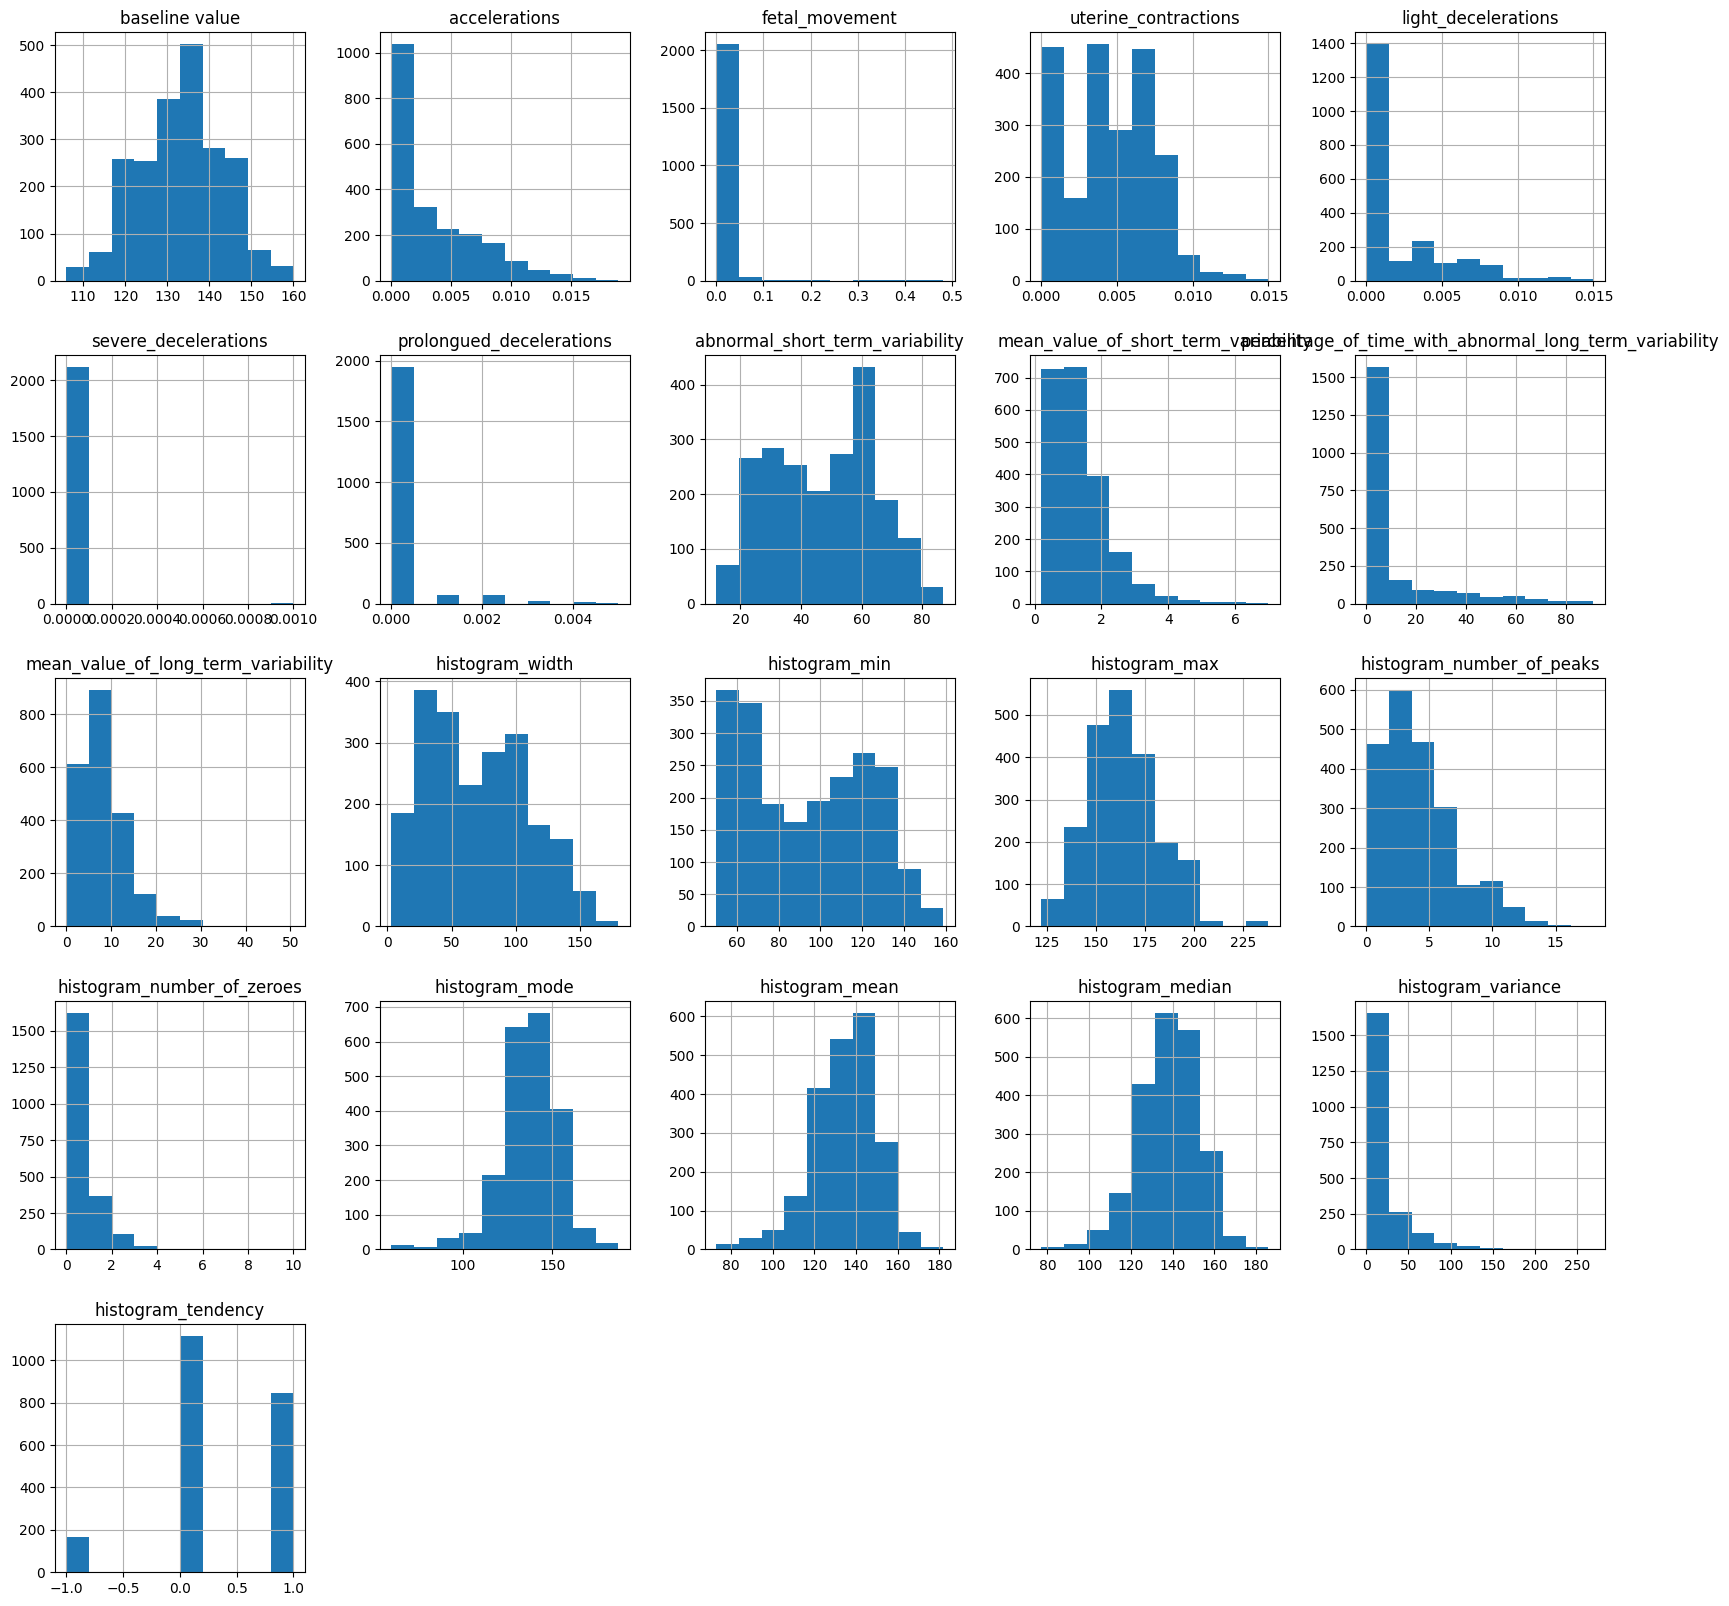

In [5]:
##univariate analysis

data.hist(figsize=(20,20))
plt.show()

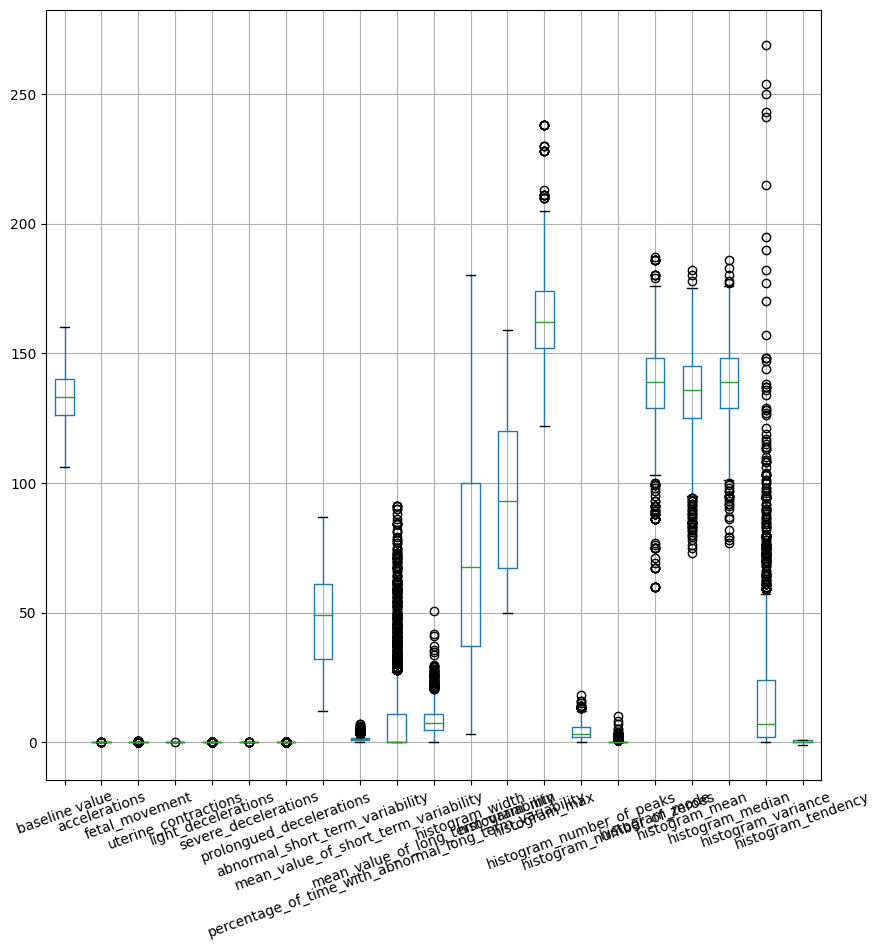

In [6]:
data.boxplot(figsize=(10,10))
plt.xticks(rotation = 20)
plt.show()

<Axes: xlabel='fetal_health', ylabel='count'>

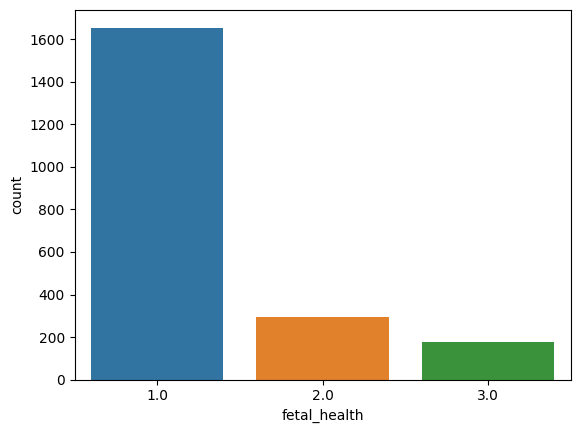

In [7]:
sns.countplot(x=data["fetal_health"])

<ipython-input-8-87ad2919c645>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

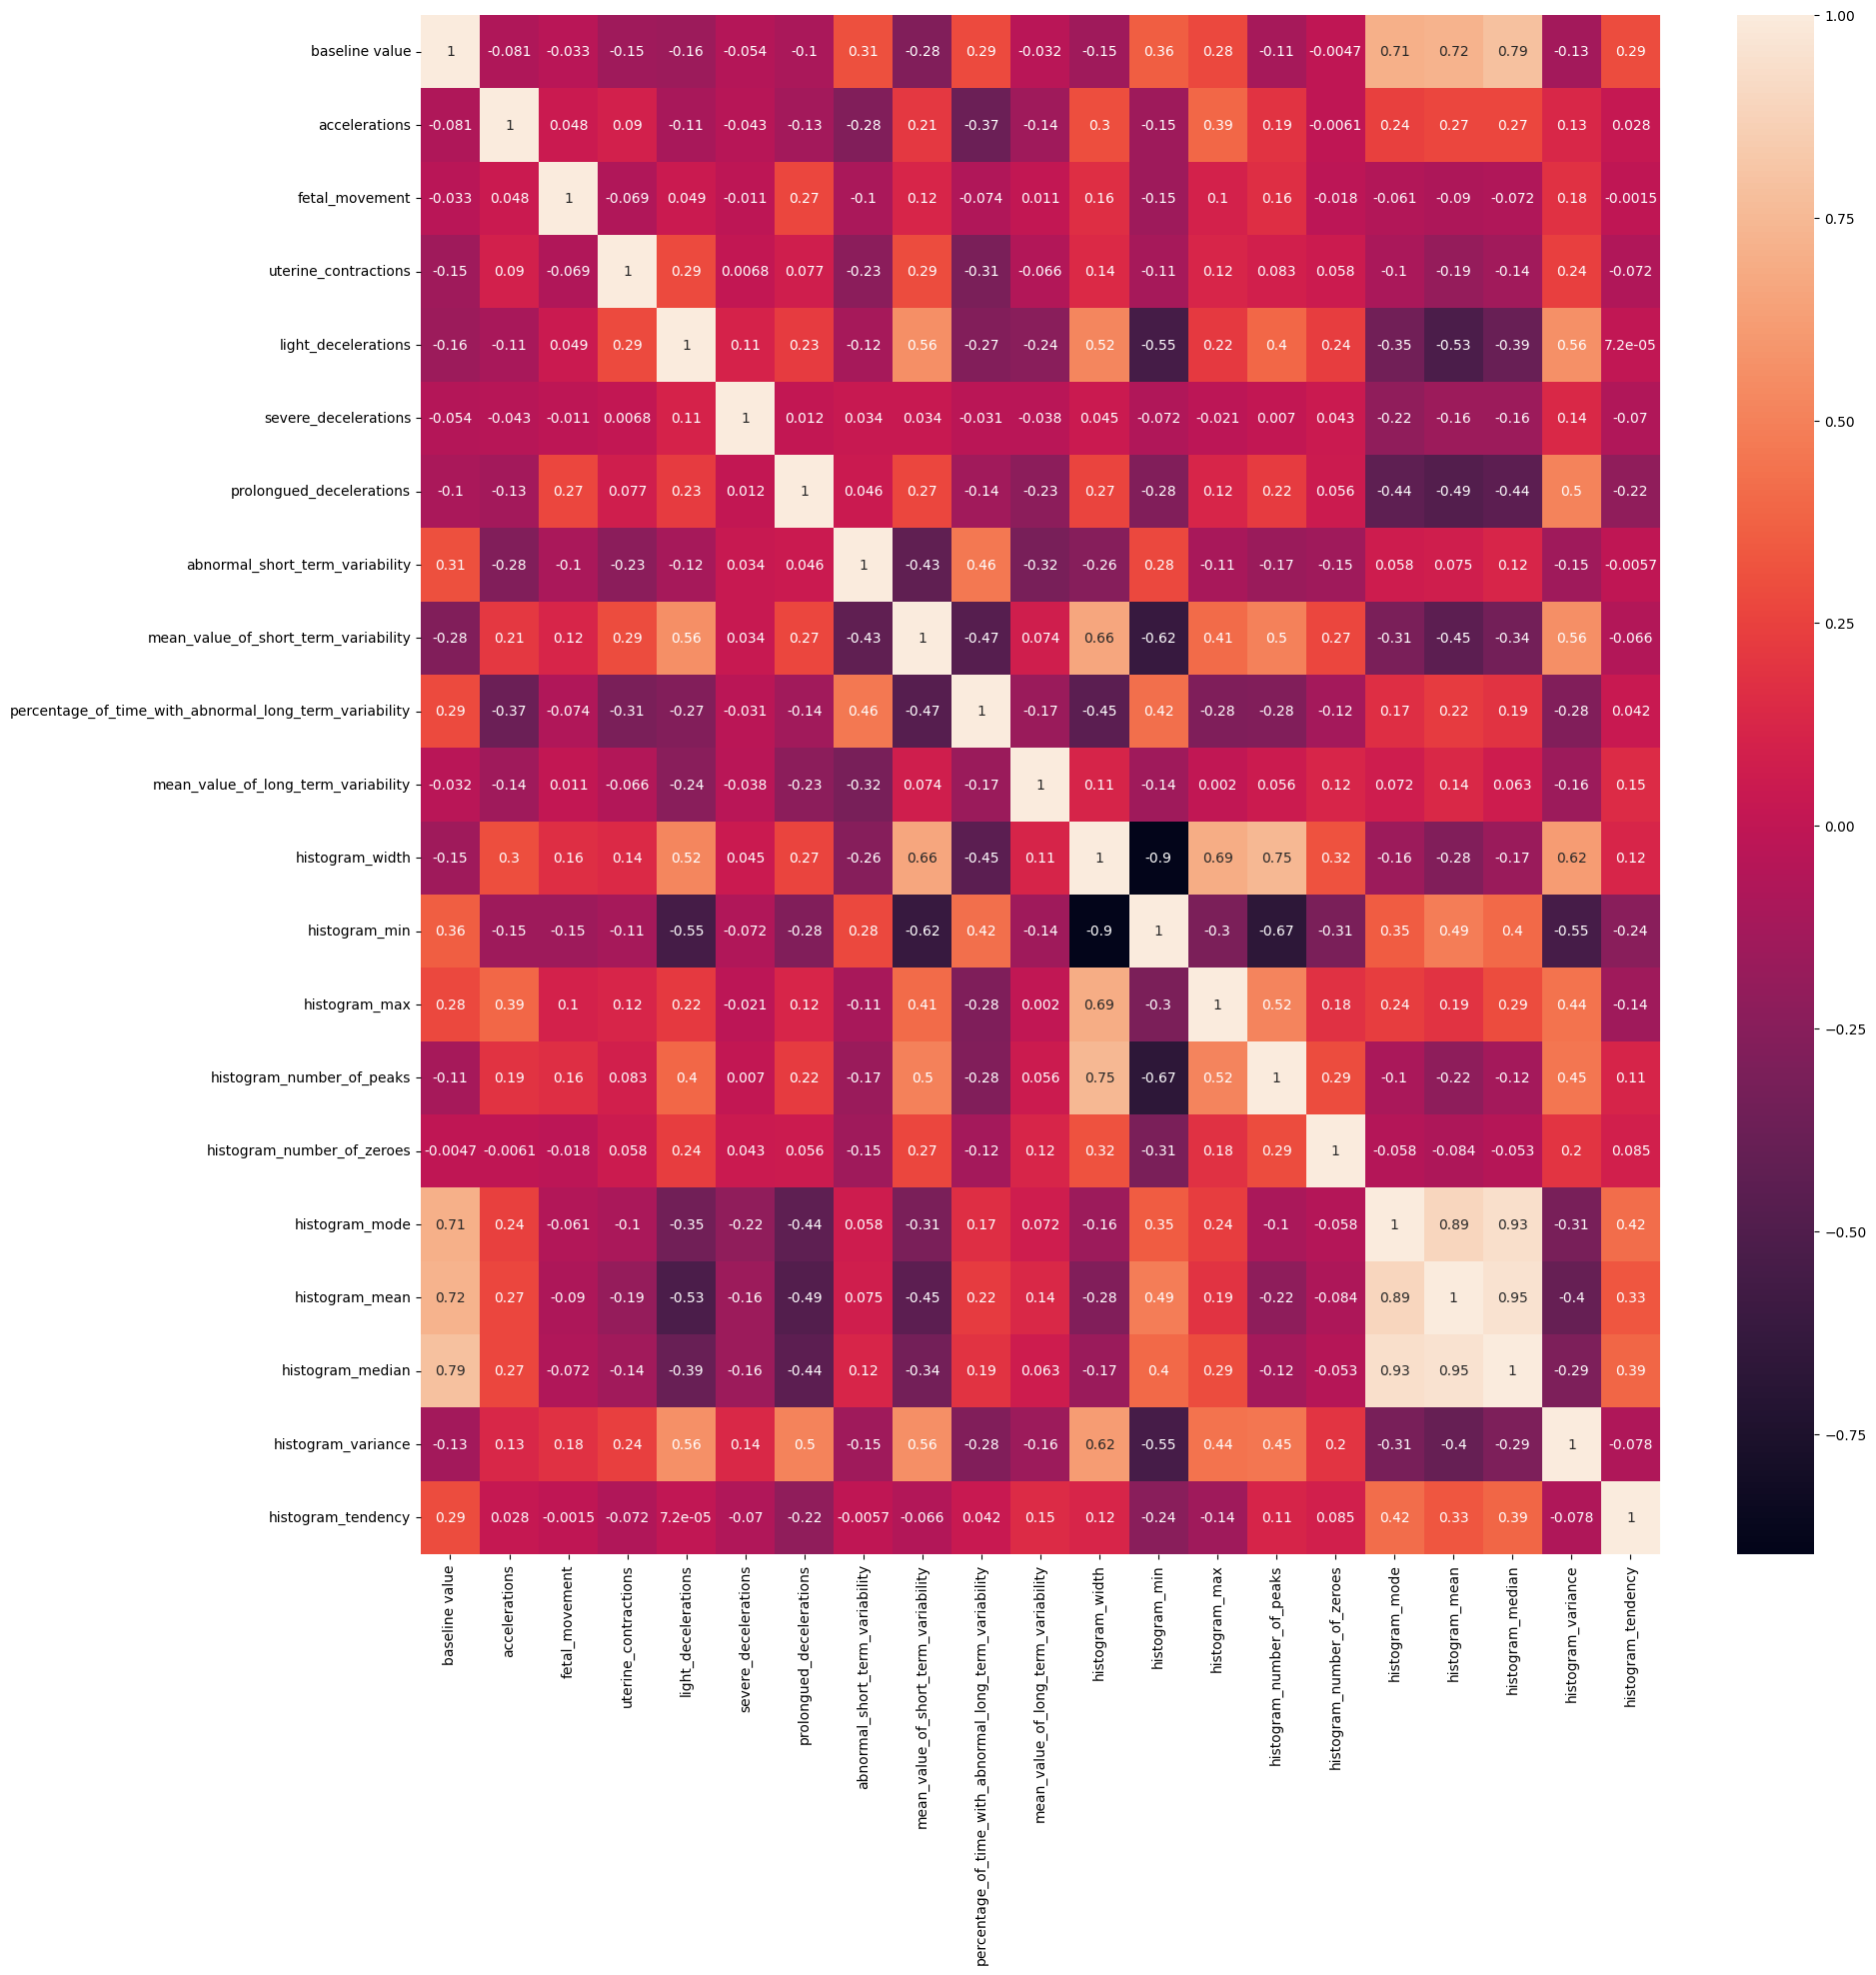

In [8]:
##heatmap

corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, annot = True)

In [9]:
##removing features with low variance

selector = VarianceThreshold(threshold=0.25)
selector.fit(data.iloc[:,:-1])
useful_col = [column for column in data.iloc[:,:-1].columns if column not in data.iloc[:,:-1].columns[selector.get_support()]]
for features in useful_col:
    print('Low variance features: ', features)

data = data.drop(useful_col,axis=1)
data = data.drop_duplicates()
data.head()

Low variance features:  accelerations
Low variance features:  fetal_movement
Low variance features:  uterine_contractions
Low variance features:  light_decelerations
Low variance features:  severe_decelerations
Low variance features:  prolongued_decelerations


,baseline value,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


the balanced data has 4938 rows


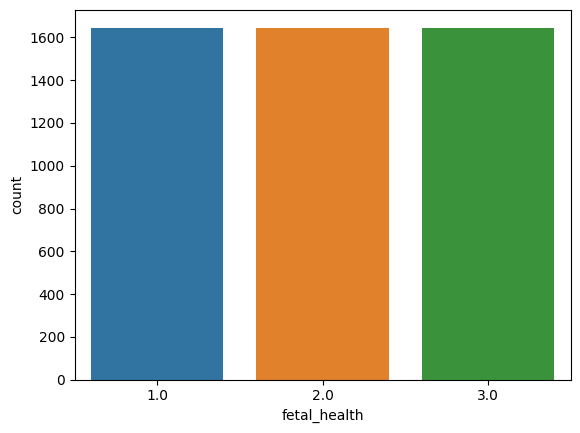

In [10]:
##SMOTE to even the predicting classes

data1 = data.copy()
X = data1.iloc[:,:-1]
Y = data1.iloc[:,-1]

smote = SMOTE(sampling_strategy="not majority")
sampled_data = smote.fit_resample(X, Y)

Balanced_data = sampled_data[0]
Balanced_data["fetal_health"] = sampled_data[1]

sns.countplot(x=Balanced_data["fetal_health"])
print("the balanced data has", Balanced_data.shape[0], "rows")

In [11]:
print("the balanced data has", Balanced_data.shape[0], "rows")
print("the original data has", data.shape[0], "rows")


the balanced data has 4938 rows
the original data has 2112 rows


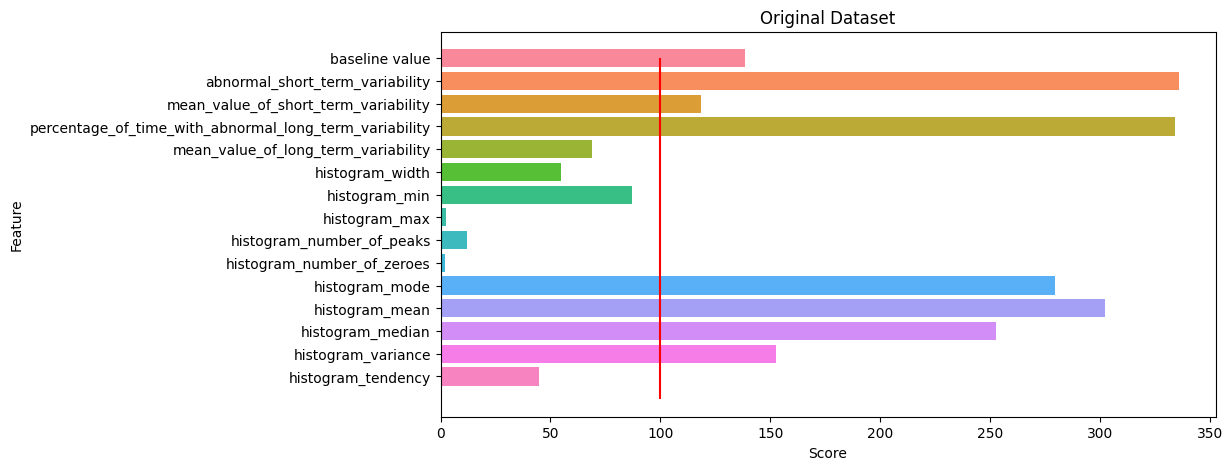

In [12]:
##feature selection

selector = SelectKBest(k='all')
selector.fit(X,Y)

dfscores = pd.DataFrame(selector.scores_)
dfcolumns = pd.DataFrame(X.columns)
original_featureScores = pd.concat([dfcolumns,dfscores],axis=1)
original_featureScores.columns = ['Feature','Score'] 

fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(data=original_featureScores, x='Score', y='Feature',linewidth=1, saturation=4, orient='h').set(title = 'Original Dataset')
plt.vlines(x = 100, ymin = 0, ymax = 15, color = 'red')
plt.show()



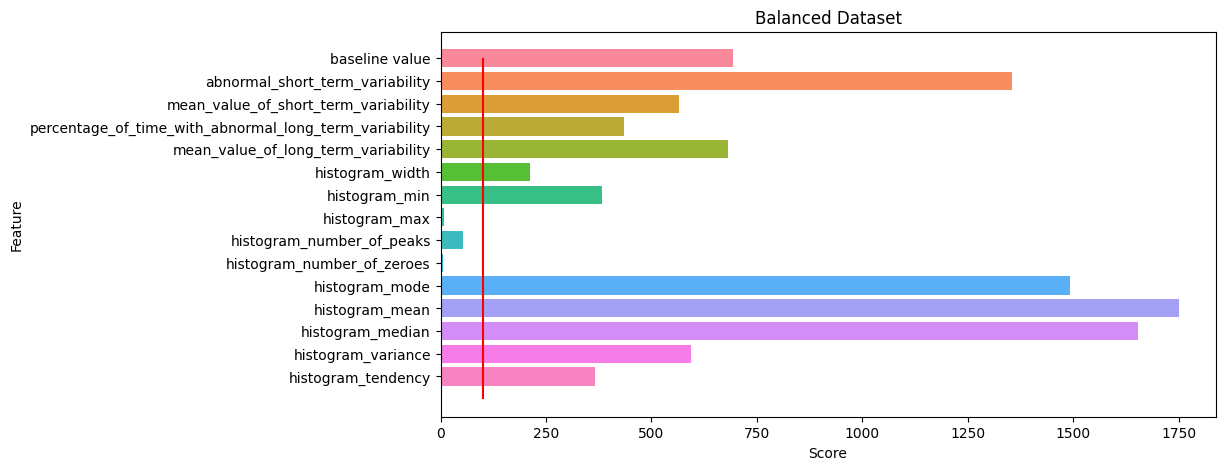

In [13]:
##feature selection

data2 = Balanced_data.copy()
X_Bal = data2.iloc[:,:-1]
Y_Bal = data2.iloc[:,-1]

selector = SelectKBest(k='all')
selector.fit(X_Bal,Y_Bal)

dfscores = pd.DataFrame(selector.scores_)
dfcolumns = pd.DataFrame(X.columns)
balanced_featureScores = pd.concat([dfcolumns,dfscores],axis=1)
balanced_featureScores.columns = ['Feature','Score'] 

fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(data=balanced_featureScores, x='Score', y='Feature',linewidth=1, saturation=2, orient='h').set(title = 'Balanced Dataset')
plt.vlines(x = 100, ymin = 0, ymax = 15, color = 'red')
plt.show()

In [14]:
#original dataset
dataA = original_featureScores[original_featureScores["Score"]>100]
dataA = list(dataA["Feature"])
dataA.append("fetal_health")

data = data[dataA]


#balanced dataset
dataB = balanced_featureScores[balanced_featureScores['Score']>100]
dataB = list(dataB['Feature'])
dataB.append('fetal_health')

Balanced_data = Balanced_data[dataB]

Balanced_data.shape[1]

13

In [15]:
##test_train_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2)
print('Original data train set shape: ', x_train1.shape)
print('Original data test set shape: ', x_test1.shape)

x_train2, x_test2, y_train2, y_test2 = train_test_split(Balanced_data.iloc[:,:-1], Balanced_data.iloc[:,-1], test_size=0.2)
print('Balanced data train set shape: ', x_train2.shape)
print('Balanced data test set shape: ', x_test2.shape)

Original data train set shape:  (1689, 8)
Original data test set shape:  (423, 8)
Balanced data train set shape:  (3950, 12)
Balanced data test set shape:  (988, 12)


In [16]:
#scaling the data
sc1=StandardScaler()
x_train1= sc1.fit_transform(x_train1) 
x_test1= sc1.transform(x_test1)

sc2=StandardScaler()
x_train2= sc2.fit_transform(x_train2) 
x_test2= sc2.transform(x_test2) 

the best score for svm model on original data is 0.8652482269503546 for a cutoff of {'C': 0.4}.


              precision    recall  f1-score   support

         1.0       0.91      0.94      0.92       325
         2.0       0.71      0.54      0.61        69
         3.0       0.70      0.79      0.74        29

    accuracy                           0.87       423
   macro avg       0.77      0.76      0.76       423
weighted avg       0.86      0.87      0.86       423
 




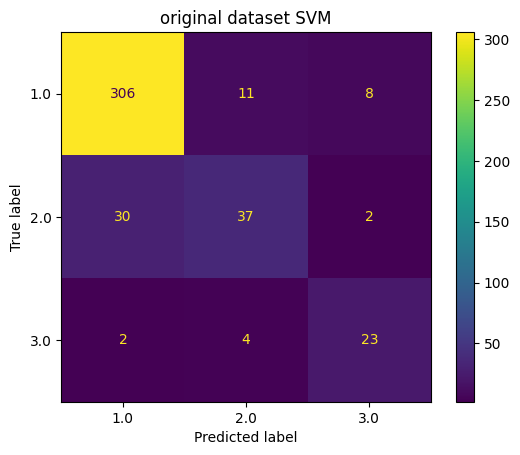

the best score for svm model on balanced data is 0.8461538461538461 for a cutoff of {'C': 0.9}.
              precision    recall  f1-score   support

         1.0       0.90      0.79      0.84       355
         2.0       0.76      0.85      0.80       327
         3.0       0.89      0.92      0.90       306

    accuracy                           0.85       988
   macro avg       0.85      0.85      0.85       988
weighted avg       0.85      0.85      0.85       988
 




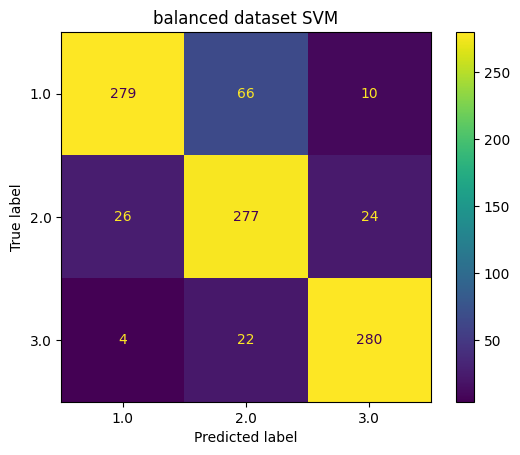

In [17]:
#suppot vector machine

cutoffs = {'C': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

svm = GridSearchCV(SVC(kernel='linear'), cutoffs, cv=5, verbose=0, scoring='accuracy')

svm.fit(x_train1, y_train1)
bestSvmCutoffOriginalData = svm.best_params_
bestSvmScoreOriginalData = svm.best_score_
y_pred1 = svm.best_estimator_.predict(x_test1)
svmAccuracyOriginalData = svm.score(x_test1, y_test1)
print("the best score for svm model on original data is {} for a cutoff of {}.\n\n".format(svmAccuracyOriginalData, bestSvmCutoffOriginalData))
print(classification_report(y_test1, y_pred1),"\n\n")
ConfusionMatrixDisplay.from_estimator(svm, x_test1, y_test1)
plt.title("original dataset SVM")
plt.show()

svm1 = GridSearchCV(SVC(kernel='linear'), cutoffs, cv=5, verbose=0, scoring='accuracy')

svm1.fit(x_train2, y_train2)
bestSvmCutoffBalancedData = svm1.best_params_
bestSvmScoreBalancedData = svm1.best_score_
y_pred2 = svm1.best_estimator_.predict(x_test2)
svmAccuracyBalancedData = svm1.score(x_test2, y_test2)
print("the best score for svm model on balanced data is {} for a cutoff of {}.".format(svmAccuracyBalancedData, bestSvmCutoffBalancedData))
print(classification_report(y_test2, y_pred2),"\n\n")
ConfusionMatrixDisplay.from_estimator(svm1, x_test2, y_test2)
plt.title("balanced dataset SVM")
plt.show()


the best score for knn model on original data is 0.91725768321513 for n_neighbours = {'n_neighbors': 4}.


              precision    recall  f1-score   support

         1.0       0.93      0.98      0.95       325
         2.0       0.88      0.67      0.76        69
         3.0       0.86      0.86      0.86        29

    accuracy                           0.92       423
   macro avg       0.89      0.83      0.86       423
weighted avg       0.92      0.92      0.91       423
 




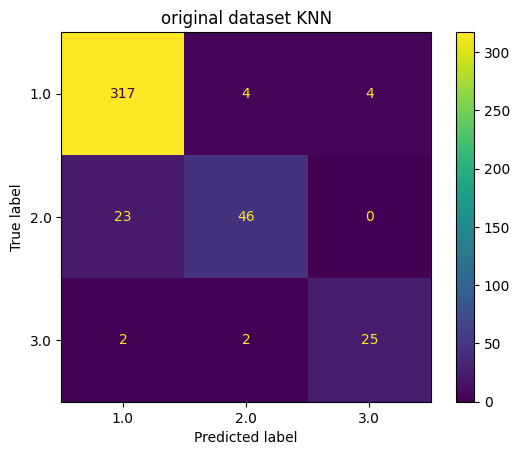

the best score for knn model on balanced data is 0.9605263157894737 for n_neighbours = {'n_neighbors': 2}.
              precision    recall  f1-score   support

         1.0       0.90      0.79      0.84       355
         2.0       0.76      0.85      0.80       327
         3.0       0.89      0.92      0.90       306

    accuracy                           0.85       988
   macro avg       0.85      0.85      0.85       988
weighted avg       0.85      0.85      0.85       988
 




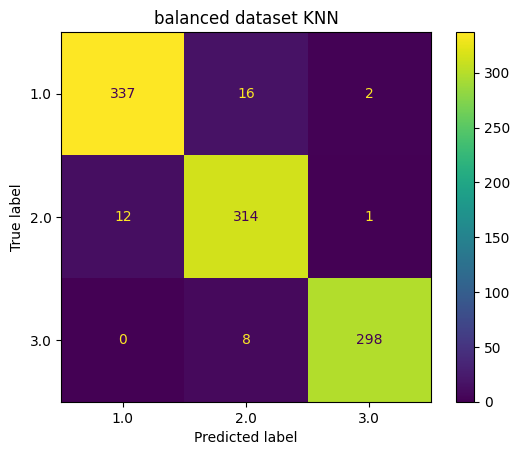

In [18]:
#KNN

nearest_neighbours = {'n_neighbors': [2,3,4,5,6,7,8,9,10]}

knn = GridSearchCV(KNeighborsClassifier(), nearest_neighbours, cv=5, verbose=0, scoring='accuracy')

knn.fit(x_train1, y_train1)
bestknnCutoffOriginalData = knn.best_params_
bestknnScoreOriginalData = knn.best_score_
knnAccuracyOriginalData = knn.score(x_test1, y_test1)
print("the best score for knn model on original data is {} for n_neighbours = {}.\n\n".format(knnAccuracyOriginalData, bestknnCutoffOriginalData))
y_pred1 = knn.best_estimator_.predict(x_test1)
print(classification_report(y_test1, y_pred1),"\n\n")
ConfusionMatrixDisplay.from_estimator(knn, x_test1, y_test1)
plt.title("original dataset KNN")
plt.show()


knn1 = GridSearchCV(KNeighborsClassifier(), nearest_neighbours, cv=5, verbose=0, scoring='accuracy')

knn1.fit(x_train2, y_train2)
bestknnCutoffBalancedData = knn1.best_params_
bestknnScoreBalancedData = knn1.best_score_
knnAccuracyBalancedData = knn1.score(x_test2, y_test2)
print("the best score for knn model on balanced data is {} for n_neighbours = {}.".format(knnAccuracyBalancedData, bestknnCutoffBalancedData))
y_pred2 = svm1.best_estimator_.predict(x_test2)
print(classification_report(y_test2, y_pred2),"\n\n")
ConfusionMatrixDisplay.from_estimator(knn1, x_test2, y_test2)
plt.title("balanced dataset KNN")
plt.show()


the best score for the decision tree model on original data is 0.9148936170212766 for n_neighbours = {'max_depth': 8}.


              precision    recall  f1-score   support

         1.0       0.93      0.98      0.95       325
         2.0       0.88      0.67      0.76        69
         3.0       0.86      0.86      0.86        29

    accuracy                           0.92       423
   macro avg       0.89      0.83      0.86       423
weighted avg       0.92      0.92      0.91       423
 




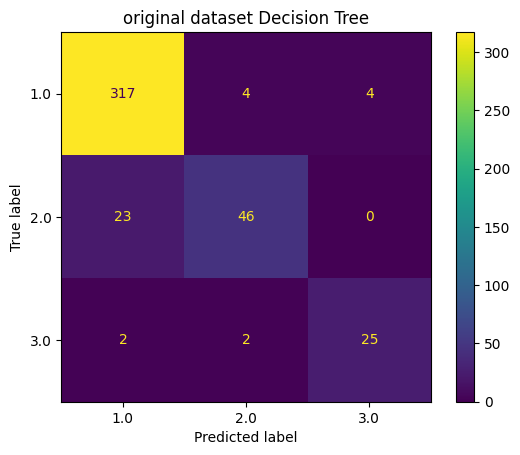

the best score for the decision tree model on balanced data is 0.9463562753036437 for n_neighbours = {'max_depth': 256}.
              precision    recall  f1-score   support

         1.0       0.90      0.79      0.84       355
         2.0       0.76      0.85      0.80       327
         3.0       0.89      0.92      0.90       306

    accuracy                           0.85       988
   macro avg       0.85      0.85      0.85       988
weighted avg       0.85      0.85      0.85       988
 




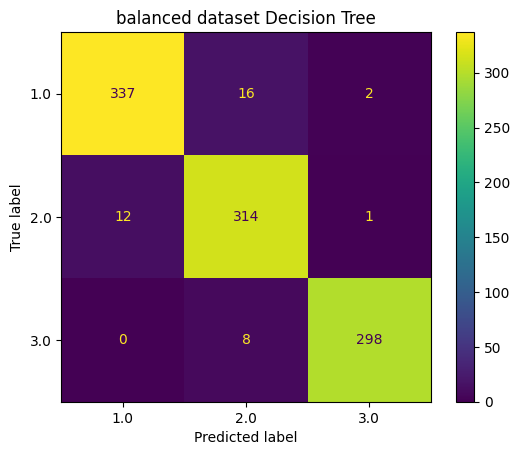

In [19]:
##Decision tree

max_depth = {'max_depth': [2, 4, 8, 16, 36, 64, 128, 256]}

decisiontree = GridSearchCV(DecisionTreeClassifier(), max_depth, cv=5, verbose=0, scoring='accuracy')

decisiontree.fit(x_train1, y_train1)
bestdecisiontreeCutoffOriginalData = decisiontree.best_params_
bestdecisiontreeScoreOriginalData = decisiontree.best_score_
decisiontreeAccuracyOriginalData = decisiontree.score(x_test1, y_test1)
print("the best score for the decision tree model on original data is {} for n_neighbours = {}.\n\n".format(decisiontreeAccuracyOriginalData, bestdecisiontreeCutoffOriginalData))
y_pred1 = knn.best_estimator_.predict(x_test1)
print(classification_report(y_test1, y_pred1),"\n\n")
ConfusionMatrixDisplay.from_estimator(knn, x_test1, y_test1)
plt.title("original dataset Decision Tree")
plt.show()


decisiontree1 = GridSearchCV(DecisionTreeClassifier(), max_depth, cv=5, verbose=0, scoring='accuracy')

decisiontree1.fit(x_train2, y_train2)
bestdecisiontreeCutoffBalancedData = decisiontree1.best_params_
bestdecisiontreeScoreBalancedData = decisiontree1.best_score_
decisiontreeAccuracyBalancedData = decisiontree1.score(x_test2, y_test2)
print("the best score for the decision tree model on balanced data is {} for n_neighbours = {}.".format(decisiontreeAccuracyBalancedData, bestdecisiontreeCutoffBalancedData))
y_pred2 = svm1.best_estimator_.predict(x_test2)
print(classification_report(y_test2, y_pred2),"\n\n")
ConfusionMatrixDisplay.from_estimator(knn1, x_test2, y_test2)
plt.title("balanced dataset Decision Tree")
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb





the best score for the logistic regression model on original data is 0.8699763593380615 with parameters = {'C': 1, 'penalty': 'l2'}.


              precision    recall  f1-score   support

         1.0       0.93      0.98      0.95       325
         2.0       0.88      0.67      0.76        69
         3.0       0.86      0.86      0.86        29

    accuracy                           0.92       423
   macro avg       0.89      0.83      0.86       423
weighted avg       0.92      0.92      0.91       423
 




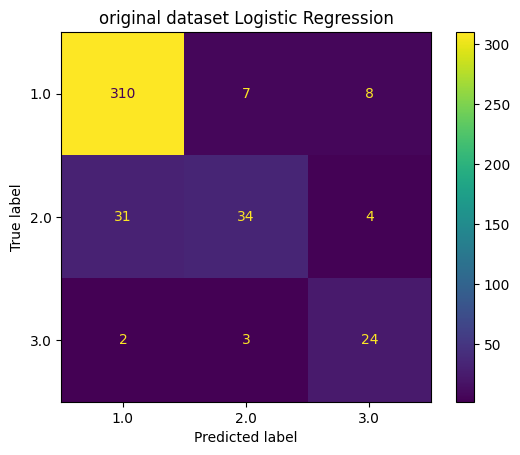

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che





the best score for the logistic regression model on balanced data is 0.8319838056680162 with parameters = {'C': 1, 'penalty': 'l2'}.


              precision    recall  f1-score   support

         1.0       0.90      0.79      0.84       355
         2.0       0.76      0.85      0.80       327
         3.0       0.89      0.92      0.90       306

    accuracy                           0.85       988
   macro avg       0.85      0.85      0.85       988
weighted avg       0.85      0.85      0.85       988
 




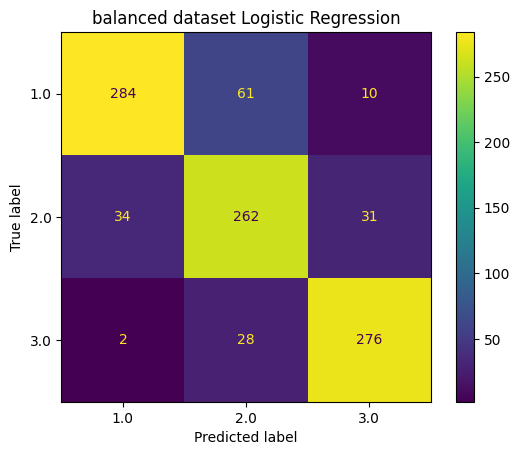

In [20]:
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

logreg1 = GridSearchCV(LogisticRegression(), param_grid, cv=5, verbose=0, scoring='accuracy')

logreg1.fit(x_train1, y_train1)
bestlogiticregressionCutoffOriginalData = logreg1.best_params_
bestlogiticregressionScoreOriginalData = logreg1.best_score_
logitsticregressionAccuracyOriginalData = logreg1.score(x_test1, y_test1)
print("\n\n\n\nthe best score for the logistic regression model on original data is {} with parameters = {}.\n\n".format(logitsticregressionAccuracyOriginalData, bestlogiticregressionCutoffOriginalData))
y_pred1 = knn.best_estimator_.predict(x_test1)
print(classification_report(y_test1, y_pred1),"\n\n")
ConfusionMatrixDisplay.from_estimator(logreg1, x_test1, y_test1)
plt.title("original dataset Logistic Regression")
plt.show()

logreg2 = GridSearchCV(LogisticRegression(), param_grid, cv=5, verbose=0, scoring='accuracy')

logreg2.fit(x_train2, y_train2)
bestlogiticregressionCutoffBalancedData = logreg2.best_params_
bestlogiticregressionScoreBalancedData = logreg2.best_score_
logitsticregressionAccuracyBalancedData = logreg2.score(x_test2, y_test2)
print("\n\n\n\nthe best score for the logistic regression model on balanced data is {} with parameters = {}.\n\n".format(logitsticregressionAccuracyBalancedData, bestlogiticregressionCutoffBalancedData))
y_pred2 = svm1.best_estimator_.predict(x_test2)
print(classification_report(y_test2, y_pred2),"\n\n")
ConfusionMatrixDisplay.from_estimator(logreg2, x_test2, y_test2)
plt.title("balanced dataset Logistic Regression")
plt.show()


the best score for the gaussian naive bayes model on original data is 0.8203309692671394 with parameters = {'var_smoothing': 1e-09}.


              precision    recall  f1-score   support

         1.0       0.93      0.98      0.95       325
         2.0       0.88      0.67      0.76        69
         3.0       0.86      0.86      0.86        29

    accuracy                           0.92       423
   macro avg       0.89      0.83      0.86       423
weighted avg       0.92      0.92      0.91       423
 




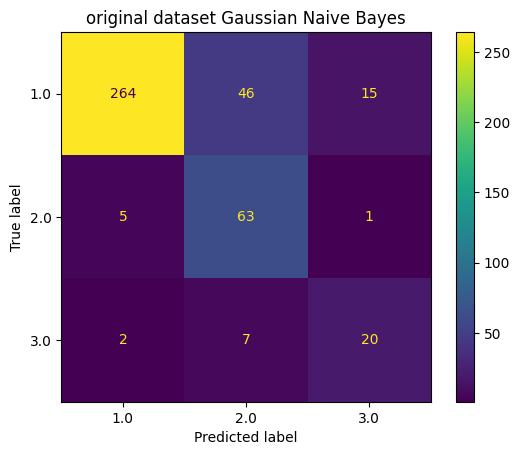

the best score for the gaussian naive bayes model on balanced data is 0.757085020242915 with parameters = {'var_smoothing': 1e-09}.


              precision    recall  f1-score   support

         1.0       0.90      0.79      0.84       355
         2.0       0.76      0.85      0.80       327
         3.0       0.89      0.92      0.90       306

    accuracy                           0.85       988
   macro avg       0.85      0.85      0.85       988
weighted avg       0.85      0.85      0.85       988
 




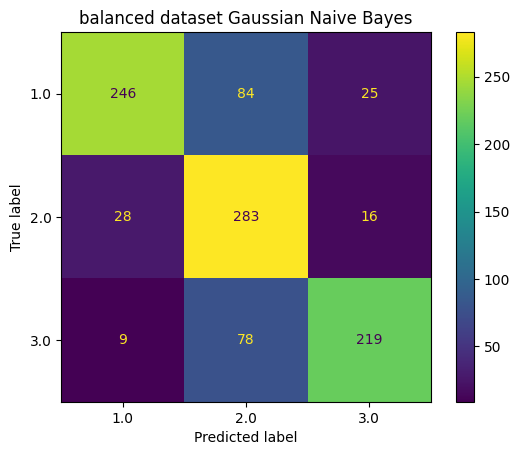

In [21]:
param_grid_nbc = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

nbc = GridSearchCV(GaussianNB(), param_grid_nbc, cv=5, verbose=0, scoring='accuracy')

nbc.fit(x_train1, y_train1)
bestNBCCutoffOriginalData = nbc.best_params_
bestlNBCScoreOriginalData = nbc.best_score_
NBCAccuracyOriginalData = nbc.score(x_test1, y_test1)
print("the best score for the gaussian naive bayes model on original data is {} with parameters = {}.\n\n".format(NBCAccuracyOriginalData, bestNBCCutoffOriginalData))
y_pred1 = knn.best_estimator_.predict(x_test1)
print(classification_report(y_test1, y_pred1),"\n\n")
ConfusionMatrixDisplay.from_estimator(nbc, x_test1, y_test1)
plt.title("original dataset Gaussian Naive Bayes")
plt.show()

nbc2 = GridSearchCV(GaussianNB(), param_grid_nbc, cv=5, verbose=0, scoring='accuracy')

nbc2.fit(x_train2, y_train2)
bestNBCCutoffBalancedData = nbc2.best_params_
bestlNBCScoreBalancedData = nbc2.best_score_
NBCAccuracyBalancedData = nbc2.score(x_test2, y_test2)
print("the best score for the gaussian naive bayes model on balanced data is {} with parameters = {}.\n\n".format(NBCAccuracyBalancedData, bestNBCCutoffBalancedData))
y_pred2 = svm1.best_estimator_.predict(x_test2)
print(classification_report(y_test2, y_pred2),"\n\n")
ConfusionMatrixDisplay.from_estimator(nbc2, x_test2, y_test2)
plt.title("balanced dataset Gaussian Naive Bayes")
plt.show()

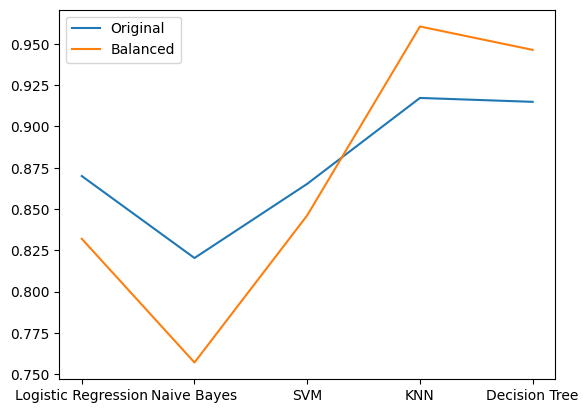

In [22]:
accuracyScoreOriginalData = [logitsticregressionAccuracyOriginalData, NBCAccuracyOriginalData, svmAccuracyOriginalData, knnAccuracyOriginalData, decisiontreeAccuracyOriginalData]
accuracyScoreBalancedData = [logitsticregressionAccuracyBalancedData ,NBCAccuracyBalancedData, svmAccuracyBalancedData, knnAccuracyBalancedData, decisiontreeAccuracyBalancedData]
models= ['Logistic Regression','Naive Bayes','SVM','KNN','Decision Tree']

fig, ax = plt.subplots()
ax.plot(models, accuracyScoreOriginalData, label = 'Original')
ax.plot(models, accuracyScoreBalancedData, label = 'Balanced')
ax.legend()

plt.show()